## Hook's law

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
#%matplotlib notebook
%matplotlib inline

In [3]:
filename = 'files/dados_start.csv'
#data = pd.read_csv(filename, encoding='ISO-8859–1')
data = pd.read_csv(filename, sep=';')

In [4]:
#X exp. values
disp = data['Displ(um)'].values
#Y exp. values
force = data['Force(mN)'].values

### Simple Linear Fitting 

In [5]:
# Linear Fit Function
# https://stackoverflow.com/questions/29382903/how-to-apply-piecewise-linear-fit-in-python
def fLinear(dsp, m, b):
    fit_Force = m * dsp + b
    return fit_Force

In [6]:
popt, pcov = curve_fit(fLinear, disp, force)
perr = np.sqrt(np.diag(pcov))
fitted_force = fLinear(disp, *popt)
rmse = np.sqrt(
    np.sum((force - fitted_force) ** 2) )
print("M: %g " %(popt[0]))
print("B: %g s" %(popt[1]))

M: -0.16104 
B: 962.597 s


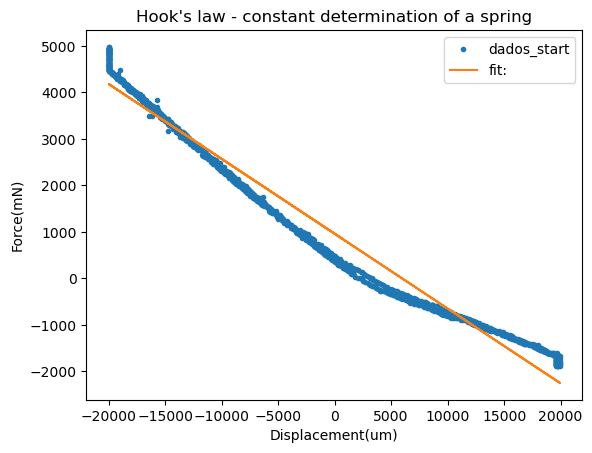

In [7]:
plt.figure()
plt.plot(disp, force, '.', label='dados_start')
plt.plot(disp, fitted_force, label='fit:')
#plt.plot(x, y2, '.', label='$\sin^{2}$')
#plt.plot(x, y3, linewidth=3)
#plt.annotate('example text', xy=(0.5, -0.75))
plt.xlabel("Displacement(um)")
plt.ylabel("Force(mN)")
plt.title("Hook's law - constant determination of a spring")
plt.legend()
plt.show()

### Piecewise Linear Fitting 

In [8]:
# Fit Function
# https://stackoverflow.com/questions/29382903/how-to-apply-piecewise-linear-fit-in-python
def piecewise_linear(x, x0, y0, k1, k2):
    return np.piecewise(x, [x < x0], [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0])

In [9]:
popt, pcov = curve_fit(piecewise_linear, disp, force)
perr = np.sqrt(np.diag(pcov))
fitted_force = piecewise_linear(disp, *popt)
rmse = np.sqrt(np.sum((force - fitted_force) ** 2) )
print("x0: %g, y0: %g " %(popt[0],popt[1]))
#print("B: %g s" %(popt[1]))

x0: -265.951, y0: 318.92 


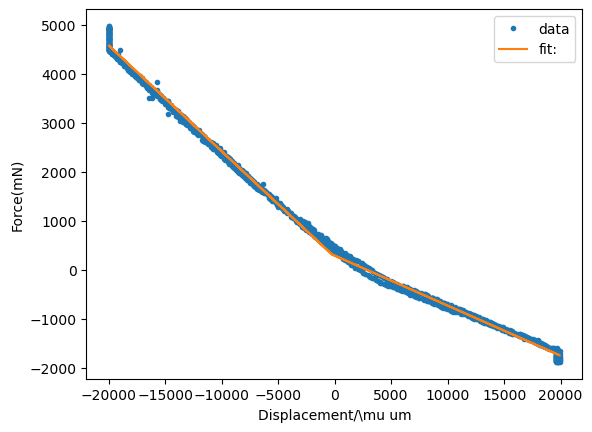

In [10]:
# Plot chosen data and fit results
#pnames = ['Isat', 'Vf', 'Te']
#punits = ['mA', 'V', 'eV']
fig2, ax2 = plt.subplots(1)
ax2.plot(disp, force, '.', label='data')
ax2.plot(disp, fitted_force, label='fit:')
ax2.legend()
ax2.set_xlabel('Displacement/\mu um')
ax2.set_ylabel('Force(mN)')
plt.show(block=True)